**A. Accuracy**

In [4]:
#import modules
import warnings
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
iris = datasets.load_iris()
# # Create feature matrix
X = iris.data
# Create target vector
y = iris.target
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7
#cross-validation settings
kfold = model_selection.KFold(n_splits=10, random_state=seed)
#Model instance
model = LogisticRegression()
#Evaluate model performance
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('Accuracy - val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)
#accuracy on test set
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy - val set: 94.67% (0.06)
Accuracy - test set: 92.00%


**B. Confusion Matrix**

[[13  0  0]
 [ 0 17  2]
 [ 0  0 18]]


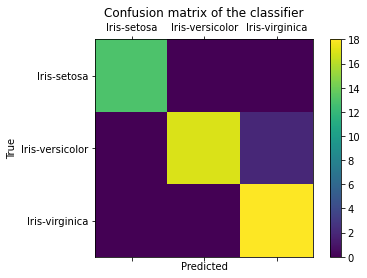

In [8]:
import warnings
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline  

#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url)
# df = df.values
X = df.iloc[:,0:4]
y = df.iloc[:,4]
# print (y.unique())
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7
#Split data into train and test set. 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#Train Model
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

#Construct the Confusion Matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**C. Log Loss**

In [12]:
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

warnings.filterwarnings('ignore')
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
#predict and compute logloss
pred = model.predict(X_test)
accuracy = log_loss(y_test, pred)
print("Logloss: %.2f" % (accuracy))

Logloss: 7.89


**D. Area Under Curve**

AUC - Test Set: 82.85%


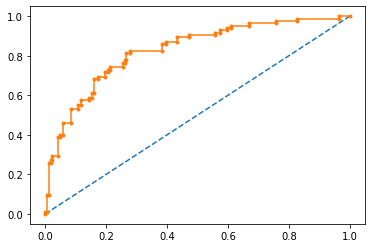

In [15]:
#Classification Area under curve
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**E. F-Measure**

In [18]:
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
test_size = 0.33
seed = 7

model = LogisticRegression()
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
precision = precision_score(y_test, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred)
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)

Precision: 0.701493
Recall: 0.552941
F1 score: 0.618421


**F. Regression Metrics**

In [20]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
dataframe = pandas.read_csv(url, delim_whitespace=True)
df = dataframe.values
X = df[:,:-1]
y = df[:,-1]
seed = 7
model = LinearRegression()
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
#predict
pred = model.predict(X_test)
print("MAE test score:", mean_absolute_error(y_test, pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, pred)))

MAE test score: 3.4689979357464624
RMSE test score: 5.017773367938006
